**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

**Memanggil Data**

In [3]:
df_test = pd.read_csv('/content/application_test.csv')
df_train = pd.read_csv('/content/application_train.csv')


**Melihat 5 data pertama**

In [4]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Melihat Tipe Data**

In [5]:
df_train.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS_E

**Melihat perbandingan kategori variabel target**

In [6]:
def data_split(df, start, end, date_col):
    """
    split the dataset into training or testing using date
    :param data: (df) pandas dataframe, start, end
    :return: (df) pandas dataframe
    """
    data = df[(df[date_col] >= start) & (df[date_col] < end)]
    #data = df[(df.order_date >= start) & (df.order_date < end)]
    data = data.reset_index(drop=True)
    #data = data.sort_values(["date", "tic"], ignore_index=True)
    #data.index = data.date.factorize()[0]
    return data


def target_info(df_target_column):
    '''
    Print target column information -- count for each unique values in target column
    Input: target column in dataframe
    '''
    proportion_true=str(round(sum(df_target_column == True) / len(df_target_column), 2) * 100)

    proportion_false=str(round(sum(df_target_column == False) / len(df_target_column), 3) * 100)

    print('There are total {} records in our data.'.format(len(df_target_column)))
    print('Is Fraud:')
    print('Count: {}'.format(sum(df_target_column == True)))
    print('Proportion (Fraud): {}'.format(proportion_true
                                  + '%'))
    print('Not Fraud:')
    print('Count: {}'.format(sum(df_target_column == False)))
    print('Proportion (Not Fraud): {}'.format(proportion_false
                                  + '%'))
    plt.figure(figsize=(5, 5))
    sns.barplot(x=df_target_column.value_counts().index, y=df_target_column.value_counts())
    plt.title('Not Fraud vs Fraud Counts')
    plt.ylabel('Count')
    return proportion_true

There are total 3864 records in our data.
Is Fraud:
Count: 303
Proportion (Fraud): 8.0%
Not Fraud:
Count: 3561
Proportion (Not Fraud): 92.2%


'8.0'

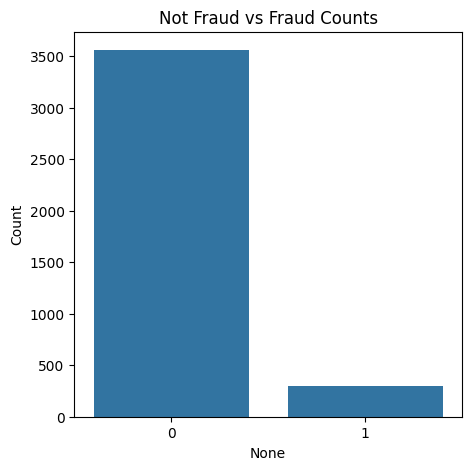

In [7]:
target_info(df_train['TARGET'])

**Jumlah Nasabah**

In [8]:
customers = df_train.groupby('TARGET')['CODE_GENDER'].count().reset_index()
customers.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

customers['Customers_pct'] = round(customers.Customers / customers.Customers.sum(), 2)
customers

,TARGET,Customers,Customers_pct
0,0,3561,0.92
1,1,303,0.08


**Status Nasabah**

In [9]:
NAME_FAMILY_STATUS_count = df_train.NAME_FAMILY_STATUS.value_counts()
NAME_FAMILY_STATUS_count

Married                 2470
Single / not married     552
Civil marriage           364
Widow                    242
Separated                236
Name: NAME_FAMILY_STATUS, dtype: int64

<Axes: ylabel='NAME_FAMILY_STATUS'>

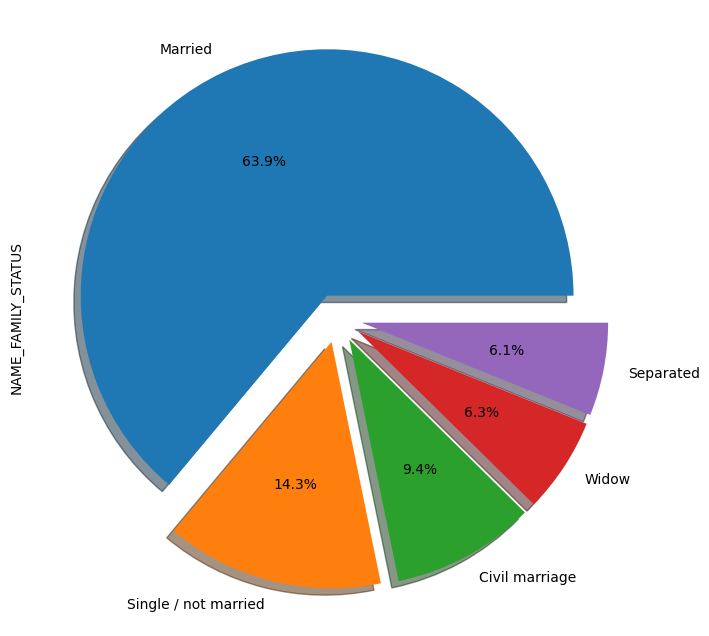

In [12]:
df_train['NAME_FAMILY_STATUS'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))

In [ ]:
Marital_status = []
married = ['Married', 'Civil marriage']

for i in df_train.NAME_FAMILY_STATUS:
    if i in married:
        Marital_status.append('Married')
    else:
        Marital_status.append('Unmarried')

df_train['Marital_status'] = Marital_status
df_train.drop(columns= 'NAME_FAMILY_STATUS', inplace=True)

In [ ]:
NAME_FAMILY_STATUS_new = df_train[df_train['TARGET'] == 0].groupby(['Marital_status'])['CODE_GENDER'].count().reset_index()
NAME_FAMILY_STATUS_new

,Marital_status,CODE_GENDER
0,Married,75194
1,Unmarried,26397


In [ ]:
NAME_FAMILY_STATUS_new = df_train[df_train['TARGET'] == 0].groupby(['Marital_status'])['CODE_GENDER'].count().reset_index()
NAME_FAMILY_STATUS_new.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

NAME_FAMILY_STATUS_new['Customers_pct'] = round(customers.Customers / customers.Customers.sum(), 2)
NAME_FAMILY_STATUS_new

,Marital_status,Customers Count,Customers_pct
0,Married,75194,0.92
1,Unmarried,26397,0.08


In [ ]:
status_menikah = df_train.groupby(['Marital_status', 'TARGET'])['CODE_GENDER'].count().reset_index()
status_menikah .rename(columns={'CODE_GENDER': 'Customers'}, inplace=True)

status_menikah ['Customers_pct'] = round(status_menikah.Customers / status_menikah.Customers.sum(), 2)
mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

status_menikah['TARGET'] = status_menikah['TARGET'].map(mapping_target)
status_menikah

,Marital_status,TARGET,Customers,Customers_pct
0,Married,Tidak Terkendala,75194,0.68
1,Married,Terkendala,6457,0.06
2,Unmarried,Tidak Terkendala,26397,0.24
3,Unmarried,Terkendala,2564,0.02


**Usia Nasabah**

In [ ]:
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH']//365
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'].abs()
df_train['DAYS_BIRTH']

0         26.0
1         46.0
2         53.0
3         53.0
4         55.0
          ... 
110607    37.0
110608    57.0
110609    43.0
110610    48.0
110611     NaN
Name: DAYS_BIRTH, Length: 110612, dtype: float64

In [ ]:
age_category = []
for i in df_train['DAYS_BIRTH']:
    if i < 36:
        age_category.append('Young Adult')
    elif i < 51:
        age_category.append('Adult')
    else:
        age_category.append('Older')

df_train['Age_Category'] = age_category

In [ ]:
category_age = df_train.groupby(['Age_Category','TARGET'])['CODE_GENDER'].count().reset_index().sort_values('Age_Category').reset_index()
category_age.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
category_age.drop(columns = 'index', inplace=True)

name_of_ot = list(category_age['Age_Category'].unique())
percentage = []

for i in name_of_ot:
    data = category_age[category_age['Age_Category'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

category_age['percentage'] = percentage

mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

category_age['TARGET'] = category_age['TARGET'].map(mapping_target)
category_age

,Age_Category,TARGET,Customers,percentage
0,Adult,Tidak Terkendala,39368,0.92
1,Adult,Terkendala,3502,0.08
2,Older,Tidak Terkendala,35071,0.94
3,Older,Terkendala,2181,0.06
4,Young Adult,Tidak Terkendala,27152,0.89
5,Young Adult,Terkendala,3338,0.11


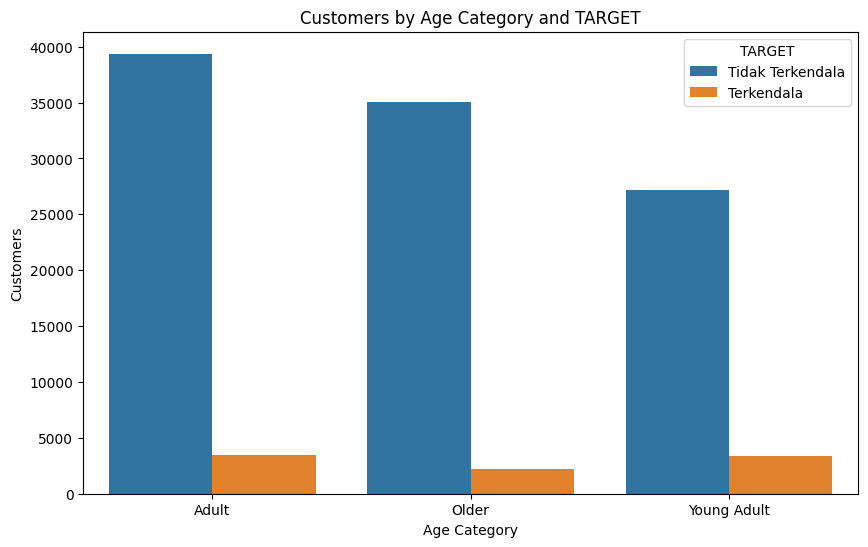

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Customers', hue='TARGET', data=category_age)

plt.xlabel('Age Category')
plt.ylabel('Customers')
plt.title('Customers by Age Category and TARGET')
plt.legend(title='TARGET')
plt.show()

**Tipe Income**

In [ ]:
it = df_train.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
it.sort_values(by='SK_ID_CURR', ascending=False)
it.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,0,4
1,Commercial associate,0,23778
2,Commercial associate,1,1907
3,Maternity leave,0,2
4,Pensioner,0,18710
5,Pensioner,1,1095
6,State servant,0,7297
7,State servant,1,459
8,Student,0,10
9,Unemployed,0,6


In [ ]:
df_train[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
6,Unemployed,0.400000
7,Working,0.096880
1,Commercial associate,0.074246
4,State servant,0.059180
3,Pensioner,0.055289
0,Businessman,0.000000
2,Maternity leave,0.000000
5,Student,0.000000


**Tipe Kontrak**

In [ ]:
tipe_kontrak = df_train.groupby([ 'NAME_CONTRACT_TYPE','TARGET'])['CODE_GENDER'].count().reset_index().sort_values(by = 'NAME_CONTRACT_TYPE')
tipe_kontrak.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

nama_tipe_kontrak  = list(tipe_kontrak['NAME_CONTRACT_TYPE'].unique())
percentage = []

for i in nama_tipe_kontrak:
    data = tipe_kontrak[tipe_kontrak['NAME_CONTRACT_TYPE'] == i]
    total = data['Customers Count'].sum()
    for x,y in enumerate(data['Customers Count']):
        pct = round(y / total, 2)
        percentage.append(pct)

tipe_kontrak['Percent'] = percentage
tipe_kontrak['Percent All'] = round(tipe_kontrak['Customers Count'] / total, 2)
mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

tipe_kontrak['TARGET'] = tipe_kontrak['TARGET'].map(mapping_target)
tipe_kontrak

,NAME_CONTRACT_TYPE,TARGET,Customers Count,Percent,Percent All
0,Cash loans,Tidak Terkendala,91679,0.92,8.73
1,Cash loans,Terkendala,8429,0.08,0.80
2,Revolving loans,Tidak Terkendala,9912,0.94,0.94
3,Revolving loans,Terkendala,592,0.06,0.06


**Jenis Pekerjaan**

In [ ]:
jenis_kerja = df_train.groupby([ 'OCCUPATION_TYPE','TARGET'])['CODE_GENDER'].count().reset_index().sort_values(by = 'OCCUPATION_TYPE')
jenis_kerja.rename(columns = {'CODE_GENDER' : 'Customers Count'}, inplace=True)

nama_jenis_kerja  = list(jenis_kerja['OCCUPATION_TYPE'].unique())
percentage = []

for i in nama_jenis_kerja:
    data = jenis_kerja[jenis_kerja['OCCUPATION_TYPE'] == i]
    total = data['Customers Count'].sum()
    for x,y in enumerate(data['Customers Count']):
        pct = round(y / total, 2)
        percentage.append(pct)

jenis_kerja['Percent'] = percentage
jenis_kerja['Percent All'] = round(jenis_kerja['Customers Count'] / total, 2)

mapping_target = {
    1 : 'Terkendala',
    0 : 'Tidak Terkendala'
}

jenis_kerja['TARGET'] = jenis_kerja['TARGET'].map(mapping_target)
jenis_kerja.sort_values('Percent', ascending=False).head(10)

,OCCUPATION_TYPE,TARGET,Customers Count,Percent,Percent All
14,IT staff,Tidak Terkendala,182,0.96,0.39
0,Accountants,Tidak Terkendala,3402,0.95,7.22
30,Secretaries,Tidak Terkendala,429,0.94,0.91
12,High skill tech staff,Tidak Terkendala,3813,0.94,8.10
20,Managers,Tidak Terkendala,7190,0.94,15.27
6,Core staff,Tidak Terkendala,9238,0.93,19.61
24,Private service staff,Tidak Terkendala,884,0.93,1.88
22,Medicine staff,Tidak Terkendala,2912,0.93,6.18
10,HR staff,Tidak Terkendala,186,0.92,0.39
26,Realty agents,Tidak Terkendala,243,0.91,0.52


**Missing Value**

In [ ]:
data_NA = pd.DataFrame(df_train.isna().sum().sort_values(ascending=False), columns=['Total Null Data']).reset_index()
data_NA['Percentage'] = (data_NA['Total Null Data'] / len(df_train) ) * 100
data_NA.head(20)

,index,Total Null Data,Percentage
0,COMMONAREA_MODE,77214,69.806169
1,COMMONAREA_MEDI,77214,69.806169
2,COMMONAREA_AVG,77214,69.806169
3,NONLIVINGAPARTMENTS_MEDI,76693,69.335154
4,NONLIVINGAPARTMENTS_AVG,76693,69.335154
5,NONLIVINGAPARTMENTS_MODE,76693,69.335154
6,LIVINGAPARTMENTS_AVG,75560,68.310852
7,LIVINGAPARTMENTS_MODE,75560,68.310852
8,LIVINGAPARTMENTS_MEDI,75560,68.310852
9,FONDKAPREMONT_MODE,75515,68.270170


In [ ]:
df_train = df_train.drop(['COMMONAREA_MEDI',
'COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI','FONDKAPREMONT_MODE',
'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI',
'FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE'], axis = 1)
df_train = df_train.drop(columns = 'SK_ID_CURR')
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110612 entries, 0 to 110611
Data columns (total 105 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  float64
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_HOUSING_TYPE             object 
 14   REGION_POPULATION_RELATIVE    float64
 15   DAYS_BIRTH                    float64
 16   DAYS_EMPLOYED                 float64
 17   DAYS_REGISTRATION             float64
 18   DA

In [ ]:
data_NA = pd.DataFrame(df_train.isna().sum().sort_values(ascending=False), columns=['Total Null Data']).reset_index()
data_NA['Percentage'] = (data_NA['Total Null Data'] / len(df_train) ) * 100
data_NA.head(50)

,index,Total Null Data,Percentage
0,LANDAREA_MODE,65626,59.329910
1,LANDAREA_MEDI,65626,59.329910
2,LANDAREA_AVG,65626,59.329910
3,BASEMENTAREA_AVG,64673,58.468340
4,BASEMENTAREA_MODE,64673,58.468340
5,BASEMENTAREA_MEDI,64673,58.468340
6,EXT_SOURCE_1,62326,56.346509
7,NONLIVINGAREA_AVG,61027,55.172133
8,NONLIVINGAREA_MEDI,61027,55.172133
9,NONLIVINGAREA_MODE,61027,55.172133


**Cek Duplikat Data**

In [ ]:
df_train.duplicated().sum()

0

**Deskripsi Data**

In [ ]:
df_train.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,110612.000000,110611.000000,1.106110e+05,1.106110e+05,110604.000000,1.105250e+05,110611.000000,110611.000000,110611.000000,110611.000000,...,110611.000000,110611.000000,110611.000000,110611.000000,95719.000000,95719.000000,95719.000000,95719.000000,95719.000000,95719.000000
mean,0.081555,0.418123,1.693869e+05,5.988373e+05,27091.697122,5.381986e+05,0.020857,44.411216,63459.022050,-4980.956044,...,0.008245,0.000642,0.000524,0.000316,0.006676,0.007271,0.033609,0.267554,0.266394,1.891934
std,0.273687,0.721649,3.663272e+05,4.021870e+05,14519.088334,3.696097e+05,0.013820,11.964383,140980.054246,3523.768012,...,0.090428,0.025328,0.022893,0.017786,0.086533,0.109846,0.202702,0.919161,0.614008,1.872802
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,22.000000,-17531.000000,-22392.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16488.000000,2.385000e+05,0.010006,34.000000,-2760.000000,-7469.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.440000e+05,5.124465e+05,24885.000000,4.500000e+05,0.018850,44.000000,-1218.000000,-4488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,54.000000,-290.000000,-2008.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,70.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,24.000000,8.000000,25.000000


In [ ]:
num = df_train.select_dtypes(include=['float64', 'int64'])
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})
df_num['Std_value'] = num.std().reset_index(drop=True)
df_num['Max'] = num.max().values
df_num['Min'] = num.min().values
df_num.sort_values('Std_value', ascending=False).head(20)

,Name_of_column,Total_unique,Std_value,Max,Min
3,AMT_CREDIT,4262,402186.990225,4050000.0,45000.0
5,AMT_GOODS_PRICE,640,369609.743417,4050000.0,45000.0
2,AMT_INCOME_TOTAL,1297,366327.186055,117000000.0,25650.0
8,DAYS_EMPLOYED,10119,140980.054246,365243.0,-17531.0
4,AMT_ANNUITY,11050,14519.088334,258025.5,1980.0
9,DAYS_REGISTRATION,14274,3523.768012,0.0,-22392.0
10,DAYS_ID_PUBLISH,5986,1510.844440,0.0,-6265.0
62,DAYS_LAST_PHONE_CHANGE,3583,827.663623,0.0,-4153.0
7,DAYS_BIRTH,49,11.964383,70.0,22.0
20,HOUR_APPR_PROCESS_START,24,3.260097,23.0,0.0


**Outlier**

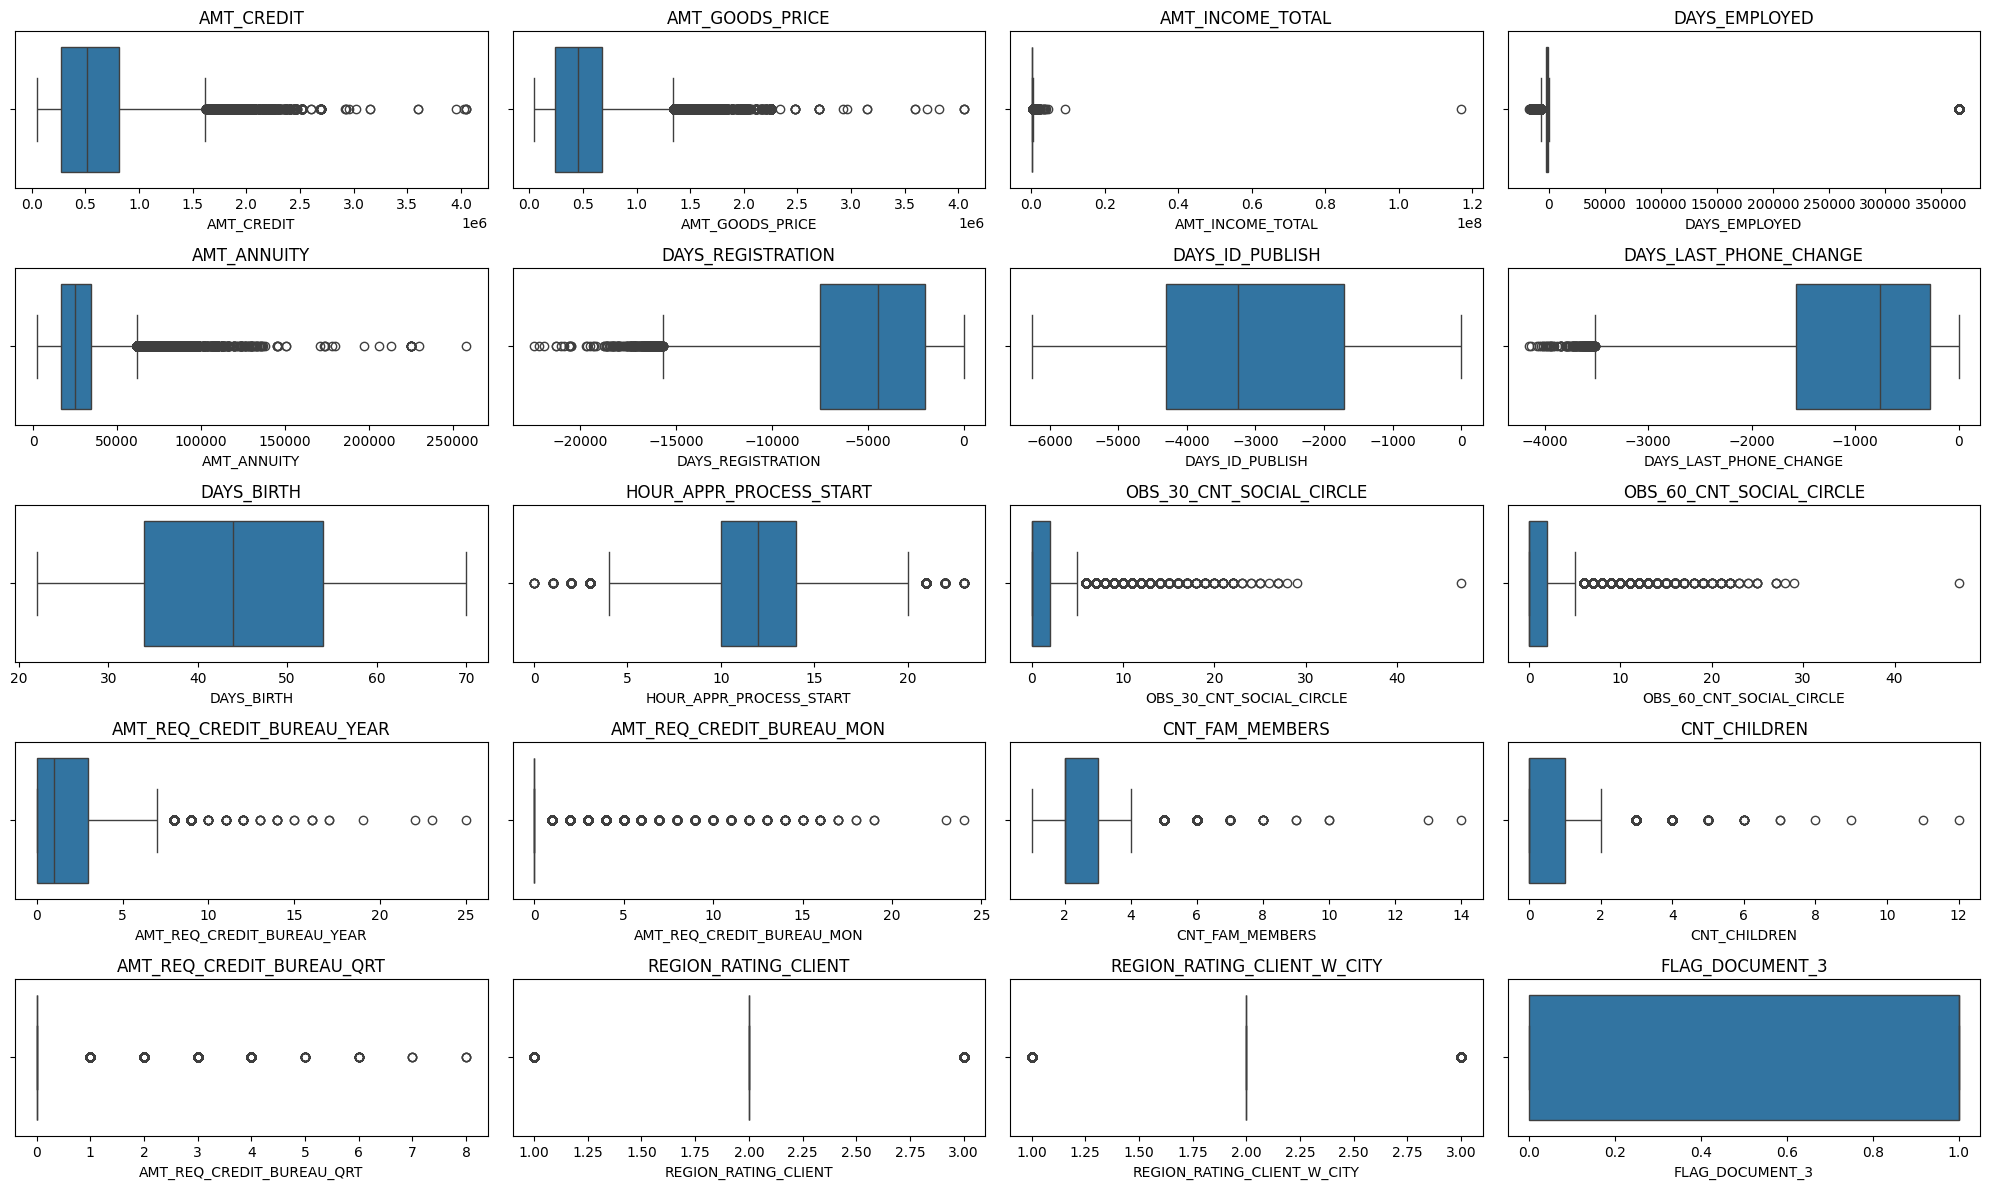

In [ ]:
# Sort the DataFrame by the 'Std_value' column in descending order and get the top 20
top_20_features = df_num.sort_values('Std_value', ascending=False).head(20)['Name_of_column'].tolist()

# Create boxplots for the top 20 features
plt.figure(figsize=(20, 12))
for i, column in enumerate(top_20_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=num, x=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

**NA diisi nilai modus untuk tipe data object**

In [ ]:
category_columns = df_train.select_dtypes(include=['object']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in category_columns):
            df_train[column] = df_train[column].fillna(df_train[column].mode()[0])

In [ ]:
df_train.select_dtypes(include=['object']).head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,Marital_status,Age_Category
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No,Unmarried,Young Adult
1,Cash loans,F,N,N,Family,State servant,Higher education,House / apartment,Core staff,MONDAY,School,block of flats,Block,No,Married,Adult
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,MONDAY,Government,block of flats,Panel,No,Unmarried,Older
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No,Married,Older
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,House / apartment,Core staff,THURSDAY,Religion,block of flats,Panel,No,Unmarried,Older


**NA diisi nilai median untuk tipe data integer dan float**

In [ ]:
integer_columns = df_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if(column in integer_columns):
            df_train[column] = df_train[column].fillna(df_train[column].median())

In [ ]:
df_train.select_dtypes(include=['int64','float64']).head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status,Age_Category
0,1,0,1,0,1,0.0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
1,0,0,0,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,1,1,1,1,0.0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0,0,0,0,1,0.0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
4,0,0,1,0,1,0.0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_var_new = df_train.select_dtypes(include = ['object']).columns.tolist()
df_train[cat_var_new] = df_train[cat_var_new].apply(LabelEncoder().fit_transform)
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status,Age_Category
0,1,0,1,0,1,0.0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
1,0,0,0,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,1,1,1,1,0.0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0,0,0,0,1,0.0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
4,0,0,1,0,1,0.0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [ ]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Marital_status,Age_Category
0,1,0,1,0,1,0.0,202500.0,406597.5,24700.5,351000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
1,0,0,0,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,1,1,1,1,0.0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0,0,0,0,1,0.0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
4,0,0,1,0,1,0.0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


**Split Data**

In [ ]:
# split data
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
          'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
           'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE']]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,0,1,0,1,7,4,1,5
1,0,0,0,0,4,1,1,39
2,1,1,1,1,7,4,1,11
3,0,0,0,1,7,4,1,5
4,0,1,0,1,7,4,1,37
...,...,...,...,...,...,...,...,...
110607,0,1,1,0,7,4,1,3
110608,0,0,0,1,7,4,1,42
110609,0,0,1,1,4,4,1,30
110610,1,1,0,1,7,1,1,9


In [ ]:
df_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
          'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
          'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE']]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,0,0,0,1,6,1,1,1,28
1,0,1,0,1,6,4,1,1,42
2,0,1,1,1,6,1,1,1,54
3,0,0,0,1,6,4,1,1,5
4,0,1,1,0,6,4,1,1,5
...,...,...,...,...,...,...,...,...,...
48739,0,0,0,1,6,4,4,1,33
48740,0,0,0,0,1,4,1,1,51
48741,0,0,1,1,1,4,1,1,5
48742,0,1,0,0,1,1,1,1,42


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

**Pemodelan dengan Logistic Regression**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
confus = confusion_matrix(y_test, y_predict)
print('Confussion Matrix: ')
print(confus)


Confussion Matrix: 
[[30511     0]
 [ 2673     0]]


In [ ]:
report = classification_report(y_test, y_predict)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30511
           1       0.00      0.00      0.00      2673

    accuracy                           0.92     33184
   macro avg       0.46      0.50      0.48     33184
weighted avg       0.85      0.92      0.88     33184



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


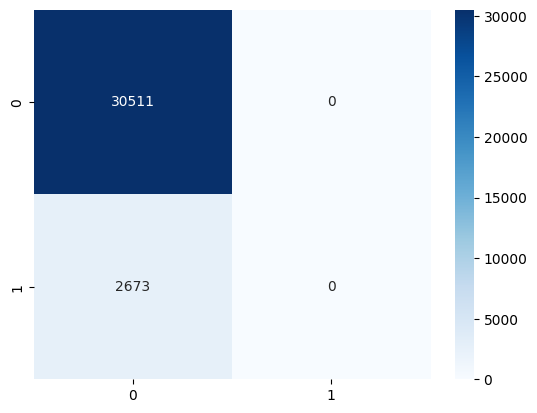

In [ ]:
sns.heatmap(confus, annot=True, fmt='d', cmap='Blues')
plt.show()

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred[0:4])
print(y_test[0:4])

[0 0 0 0]
67771     0
96591     0
67249     0
106412    0
Name: TARGET, dtype: int64


In [ ]:
print('Nilai Akurasi:', model.score(X_test, y_test))

Nilai Akurasi: 0.913874156219865


In [ ]:
confusion_matrix(y_test, model.predict(X_test))

array([[30307,   204],
       [ 2654,    19]])